# Exploring Relationships

## Contents

## 1. Importing Visualization Libraries and Data
## 2. Data cleaning checks
## 2. Exploring Relationships
     Correlations
### 2.1 Correlation matrix heatmap (colored)
### 2.2 Scatterplots for the variables with the strongest correlation
### 2.3 Pair Plots
### 2.4 Categorical Plot

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Define path

path = r'/Users/sophie/Desktop/CareerFoundry /10 2023 missing migrants'
path

'/Users/sophie/Desktop/CareerFoundry /10 2023 missing migrants'

In [4]:
df_mm = pd.read_pickle(os.path.join(path, 'Data', 'prepared data', 'prep_mm_data.pkl'))
df_mm.head()

,main_ID,incident_ID,inc_type,region_inc,website_date,year,month,num_dead,num_missing,total_dead_missing,...,country_origin,migration_route,loc_death,info_source,coordinates,UNSD_geo_group,article_title,source_quality,url,NaN_rep_tot_dead_missing
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,NaN,1,...,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,Unknown,5.0,http://humaneborders.info/,1.0
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,NaN,1,...,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,Unknown,1.0
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1.0,NaN,1,...,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,Unknown,1.0
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,January,1.0,NaN,1,...,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America,Mexico condemns the use of force by a border p...,5.0,http://bit.ly/1qfIw00,1.0
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1.0,0.0,1,...,Sudan,Unknown,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.1551, 28",Northern Europe,Sudanese migrant freezes to death in illegal E...,1.0,http://bit.ly/1rTFTjR,1.0


In [5]:
df_mm.shape

(13493, 26)

## 2. Data cleaning checks

### Check summaries

In [6]:
# Check inconsistencies
df_mm.describe()

,website_date,year,num_dead,num_missing,total_dead_missing,num_survivors,num_female,num_male,num_children,source_quality,NaN_rep_tot_dead_missing
count,13478,13493.000000,12894.000000,1363.000000,13493.00000,2185.000000,2442.000000,8303.000000,1622.000000,13492.000000,13493.000000
mean,2019-09-17 07:35:40.554978304,2019.197510,2.619280,18.674982,4.38872,40.073684,2.515971,1.825485,1.956227,3.264231,4.389461
min,2014-01-02 00:00:00,2014.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2017-10-08 00:00:00,2017.000000,1.000000,2.000000,1.00000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,2019-10-05 00:00:00,2019.000000,1.000000,6.000000,1.00000,12.000000,1.000000,1.000000,1.000000,4.000000,1.000000
75%,2021-12-01 00:00:00,2021.000000,2.000000,17.000000,2.00000,38.000000,2.000000,1.000000,2.000000,4.000000,2.000000
max,2023-10-17 00:00:00,2023.000000,750.000000,750.000000,1022.00000,1950.000000,94.000000,135.000000,250.000000,5.000000,1022.000000
std,NaN,2.482202,9.612398,45.128069,19.66173,97.033398,6.212009,4.729596,6.606593,1.371832,19.662386


In [7]:
df_mm.describe(include= object)

,main_ID,incident_ID,inc_type,region_inc,month,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,coordinates,UNSD_geo_group,article_title,url
count,13493,13493,13493,13493,13493,13493,13493,13493,13493,13493,13493,13493,13493,13493,13493
unique,13493,13493,4,16,12,34,15,345,26,7768,3958,10005,20,4417,5232
top,2014.MMP00001,2014.MMP00001,Incident,North America,September,Latin America / Caribbean (P),Drowning,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"30.96704016, 61.82069052",Northern America,Unknown,Unknown
freq,1,1,13126,2849,1315,2259,3409,7415,3581,1061,1574,200,2851,8477,3961


In [8]:
# Check inconsistencies
df_mm.dtypes

main_ID                             object
incident_ID                         object
inc_type                            object
region_inc                          object
website_date                datetime64[ns]
year                                 int64
month                               object
num_dead                           float64
num_missing                        float64
total_dead_missing                   int64
num_survivors                      float64
num_female                         float64
num_male                           float64
num_children                       float64
reg_origin                          object
cause_death                         object
country_origin                      object
migration_route                     object
loc_death                           object
info_source                         object
coordinates                         object
UNSD_geo_group                      object
article_title                       object
source_qual

In [9]:
# Check missings
df_mm.isnull().sum()

main_ID                         0
incident_ID                     0
inc_type                        0
region_inc                      0
website_date                   15
year                            0
month                           0
num_dead                      599
num_missing                 12130
total_dead_missing              0
num_survivors               11308
num_female                  11051
num_male                     5190
num_children                11871
reg_origin                      0
cause_death                     0
country_origin                  0
migration_route                 0
loc_death                       0
info_source                     0
coordinates                     0
UNSD_geo_group                  0
article_title                   0
source_quality                  1
url                             0
NaN_rep_tot_dead_missing        0
dtype: int64

In [10]:
# Check duplicates
df_dups = df_mm[df_mm.duplicated()]
df_dups

,main_ID,incident_ID,inc_type,region_inc,website_date,year,month,num_dead,num_missing,total_dead_missing,...,country_origin,migration_route,loc_death,info_source,coordinates,UNSD_geo_group,article_title,source_quality,url,NaN_rep_tot_dead_missing


In [11]:
# Check mixed-type columns
for col in df_mm.columns.tolist():
      weird = (df_mm[[col]].applymap(type) != df_mm[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_mm[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

website_date


### There are no inconsistencies in summary stats. There is missing data, but these are true missings. There are no duplicates. There is one mixed-type column: website_data entails date formatted data and NaNs.

### Create subsamples to exclude columns that are irrelevant for data exploration or sketchy.

In [12]:
# Create a subset excluding potentially problematic columns

sub = df_mm[['inc_type', 'region_inc', 'website_date', 'year','month', 
          'num_dead', 'num_missing', 'NaN_rep_tot_dead_missing', 'num_survivors', 
          'num_female', 'num_male', 'num_children', 'reg_origin', 'cause_death', 
         'country_origin', 'migration_route', 'loc_death', 'info_source', 'coordinates',
         'UNSD_geo_group', 'source_quality']]

pd.options.display.max_columns = None
sub.head(5)

,inc_type,region_inc,website_date,year,month,num_dead,num_missing,NaN_rep_tot_dead_missing,num_survivors,num_female,num_male,num_children,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,coordinates,UNSD_geo_group,source_quality
0,Incident,North America,2014-01-06,2014,January,1.0,NaN,1.0,NaN,NaN,1.0,NaN,Central America,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,5.0
1,Incident,North America,2014-01-12,2014,January,1.0,NaN,1.0,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,5.0
2,Incident,North America,2014-01-14,2014,January,1.0,NaN,1.0,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America,5.0
3,Incident,North America,2014-01-16,2014,January,1.0,NaN,1.0,NaN,NaN,1.0,NaN,Central America,Violence,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America,5.0
4,Incident,Europe,2014-01-16,2014,January,1.0,0.0,1.0,2.0,NaN,1.0,NaN,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,Unknown,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.1551, 28",Northern Europe,1.0


In [13]:
# Create a subset of numeric colums

sub_2 = df_mm[['website_date', 'year',
          'num_dead', 'num_missing', 'NaN_rep_tot_dead_missing', 'num_survivors', 
          'num_female', 'num_male', 'num_children', 'source_quality']]
      
pd.options.display.max_columns = None
sub_2.head(5)

,website_date,year,num_dead,num_missing,NaN_rep_tot_dead_missing,num_survivors,num_female,num_male,num_children,source_quality
0,2014-01-06,2014,1.0,NaN,1.0,NaN,NaN,1.0,NaN,5.0
1,2014-01-12,2014,1.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0
2,2014-01-14,2014,1.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0
3,2014-01-16,2014,1.0,NaN,1.0,NaN,NaN,1.0,NaN,5.0
4,2014-01-16,2014,1.0,0.0,1.0,2.0,NaN,1.0,NaN,1.0


## 3. Exploring Relationships: Visualizations

### Correlations

In [14]:
# Create a correlation matrix using pandas

sub_2.corr()

,website_date,year,num_dead,num_missing,NaN_rep_tot_dead_missing,num_survivors,num_female,num_male,num_children,source_quality
website_date,1.000000,0.200651,-0.008478,-0.186409,-0.010636,-0.178027,-0.003609,0.005027,-0.082190,0.010142
year,0.200651,1.000000,-0.066952,-0.184249,-0.075978,-0.178719,-0.059726,-0.003769,-0.087017,0.236419
num_dead,-0.008478,-0.066952,1.000000,0.280226,0.733142,0.053907,0.370218,0.636990,0.451713,0.012029
num_missing,-0.186409,-0.184249,0.280226,1.000000,0.904056,0.217653,0.301889,0.497982,0.708630,0.085764
NaN_rep_tot_dead_missing,-0.010636,-0.075978,0.733142,0.904056,1.000000,0.089766,0.355456,0.581385,0.661636,0.040642
num_survivors,-0.178027,-0.178719,0.053907,0.217653,0.089766,1.000000,0.047569,0.075988,0.044057,-0.008493
num_female,-0.003609,-0.059726,0.370218,0.301889,0.355456,0.047569,1.000000,0.392377,0.565047,0.141668
num_male,0.005027,-0.003769,0.636990,0.497982,0.581385,0.075988,0.392377,1.000000,0.264623,0.040815
num_children,-0.082190,-0.087017,0.451713,0.708630,0.661636,0.044057,0.565047,0.264623,1.000000,0.066403
source_quality,0.010142,0.236419,0.012029,0.085764,0.040642,-0.008493,0.141668,0.040815,0.066403,1.000000


### Funneling question: Is the count of deaths related to months, is there "seasonality"? --> transform months into numeric scale 1-12

In [15]:
# Create a copy of the original DataFrame
df_month_num = df_mm.copy()

# Define a dictionary that maps month names to numbers
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Replace month names with numbers
df_month_num['month'] = df_month_num['month'].map(month_to_number)

In [16]:
df_month_num.head()

,main_ID,incident_ID,inc_type,region_inc,website_date,year,month,num_dead,num_missing,total_dead_missing,num_survivors,num_female,num_male,num_children,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,coordinates,UNSD_geo_group,article_title,source_quality,url,NaN_rep_tot_dead_missing
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,1,1.0,NaN,1,NaN,NaN,1.0,NaN,Central America,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,Unknown,5.0,http://humaneborders.info/,1.0
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,1,1.0,NaN,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,Unknown,1.0
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,1,1.0,NaN,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,Unknown,1.0
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,1,1.0,NaN,1,NaN,NaN,1.0,NaN,Central America,Violence,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America,Mexico condemns the use of force by a border p...,5.0,http://bit.ly/1qfIw00,1.0
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,1,1.0,0.0,1,2.0,NaN,1.0,NaN,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,Unknown,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.1551, 28",Northern Europe,Sudanese migrant freezes to death in illegal E...,1.0,http://bit.ly/1rTFTjR,1.0


In [17]:
# Count the unique values and their occurrences using value_counts
unique_counts = df_month_num['month'].value_counts().sort_index()

# Print the results
for month_number, count in unique_counts.items():
    print(f"Month {month_number}: {count} occurrences")

Month 1: 1061 occurrences
Month 2: 941 occurrences
Month 3: 971 occurrences
Month 4: 994 occurrences
Month 5: 1030 occurrences
Month 6: 1282 occurrences
Month 7: 1287 occurrences
Month 8: 1273 occurrences
Month 9: 1315 occurrences
Month 10: 1259 occurrences
Month 11: 1060 occurrences
Month 12: 1020 occurrences


### For a better use of the incident type variable, transform to scale:

'Incident' = 1
'Cumulative Incident' = 2
'Split Incident' = 2
'Incident,Split Incident' = 2

In [18]:
# Define a function to map the incident types
def map_incident_type(inc_type):
    if inc_type == 'Incident':
        return 1
    elif inc_type in ('Cumulative Incident', 'Split Incident', 'Incident,Split Incident'):
        return 2
    else:
        return 0  # For any other values, you can set it to 0 or handle it as needed

# Create a new column 'Incident Type numeric' with the transformed values
df_wrang = df_month_num.assign(inc_type_num=df_month_num['inc_type'].apply(map_incident_type))

In [19]:
# Count the unique values and their occurrences using value_counts
unique_counts = df_wrang['inc_type_num'].value_counts().sort_index()

# Print the results
for inc_number, count in unique_counts.items():
    print(f"Incident Type {inc_number}: {count} occurrences")

Incident Type 1: 13126 occurrences
Incident Type 2: 367 occurrences


In [20]:
# Check

# Count the unique values and their occurrences using value_counts
unique_counts = df_mm['inc_type'].value_counts().sort_index()

# Print the results
for inc_number, count in unique_counts.items():
    print(f"Incident Type {inc_number}: {count} occurrences")

Incident Type Cumulative Incident: 85 occurrences
Incident Type Incident: 13126 occurrences
Incident Type Incident,Split Incident: 5 occurrences
Incident Type Split Incident: 277 occurrences


In [21]:
df_wrang.head()

,main_ID,incident_ID,inc_type,region_inc,website_date,year,month,num_dead,num_missing,total_dead_missing,num_survivors,num_female,num_male,num_children,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,coordinates,UNSD_geo_group,article_title,source_quality,url,NaN_rep_tot_dead_missing,inc_type_num
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,1,1.0,NaN,1,NaN,NaN,1.0,NaN,Central America,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,Unknown,5.0,http://humaneborders.info/,1.0,1
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,1,1.0,NaN,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,Unknown,1.0,1
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,1,1.0,NaN,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,Unknown,1.0,1
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,1,1.0,NaN,1,NaN,NaN,1.0,NaN,Central America,Violence,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America,Mexico condemns the use of force by a border p...,5.0,http://bit.ly/1qfIw00,1.0,1
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,1,1.0,0.0,1,2.0,NaN,1.0,NaN,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,Unknown,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.1551, 28",Northern Europe,Sudanese migrant freezes to death in illegal E...,1.0,http://bit.ly/1rTFTjR,1.0,1


In [22]:
# Add transformed variables to subset for correlation analyses

sub_2 = df_wrang[['inc_type_num', 'website_date', 'year', 'month',
          'num_dead', 'num_missing', 'NaN_rep_tot_dead_missing', 'num_survivors', 
          'num_female', 'num_male', 'num_children', 'source_quality']]
      
pd.options.display.max_columns = None
sub_2.head(5)

,inc_type_num,website_date,year,month,num_dead,num_missing,NaN_rep_tot_dead_missing,num_survivors,num_female,num_male,num_children,source_quality
0,1,2014-01-06,2014,1,1.0,NaN,1.0,NaN,NaN,1.0,NaN,5.0
1,1,2014-01-12,2014,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0
2,1,2014-01-14,2014,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0
3,1,2014-01-16,2014,1,1.0,NaN,1.0,NaN,NaN,1.0,NaN,5.0
4,1,2014-01-16,2014,1,1.0,0.0,1.0,2.0,NaN,1.0,NaN,1.0


In [23]:
# Create a new correlation matrix using pandas

sub_2.corr()

,inc_type_num,website_date,year,month,num_dead,num_missing,NaN_rep_tot_dead_missing,num_survivors,num_female,num_male,num_children,source_quality
inc_type_num,1.000000,0.011034,0.024875,0.009662,0.155640,0.086983,0.157763,0.072461,0.051215,0.169607,0.149929,0.055478
website_date,0.011034,1.000000,0.200651,0.005099,-0.008478,-0.186409,-0.010636,-0.178027,-0.003609,0.005027,-0.082190,0.010142
year,0.024875,0.200651,1.000000,-0.100925,-0.066952,-0.184249,-0.075978,-0.178719,-0.059726,-0.003769,-0.087017,0.236419
month,0.009662,0.005099,-0.100925,1.000000,-0.000382,-0.011927,-0.000606,-0.001003,0.097514,0.004815,0.039885,-0.016843
num_dead,0.155640,-0.008478,-0.066952,-0.000382,1.000000,0.280226,0.733142,0.053907,0.370218,0.636990,0.451713,0.012029
num_missing,0.086983,-0.186409,-0.184249,-0.011927,0.280226,1.000000,0.904056,0.217653,0.301889,0.497982,0.708630,0.085764
NaN_rep_tot_dead_missing,0.157763,-0.010636,-0.075978,-0.000606,0.733142,0.904056,1.000000,0.089766,0.355456,0.581385,0.661636,0.040642
num_survivors,0.072461,-0.178027,-0.178719,-0.001003,0.053907,0.217653,0.089766,1.000000,0.047569,0.075988,0.044057,-0.008493
num_female,0.051215,-0.003609,-0.059726,0.097514,0.370218,0.301889,0.355456,0.047569,1.000000,0.392377,0.565047,0.141668
num_male,0.169607,0.005027,-0.003769,0.004815,0.636990,0.497982,0.581385,0.075988,0.392377,1.000000,0.264623,0.040815


### 2.1 Correlation matrix heatmap (colored)

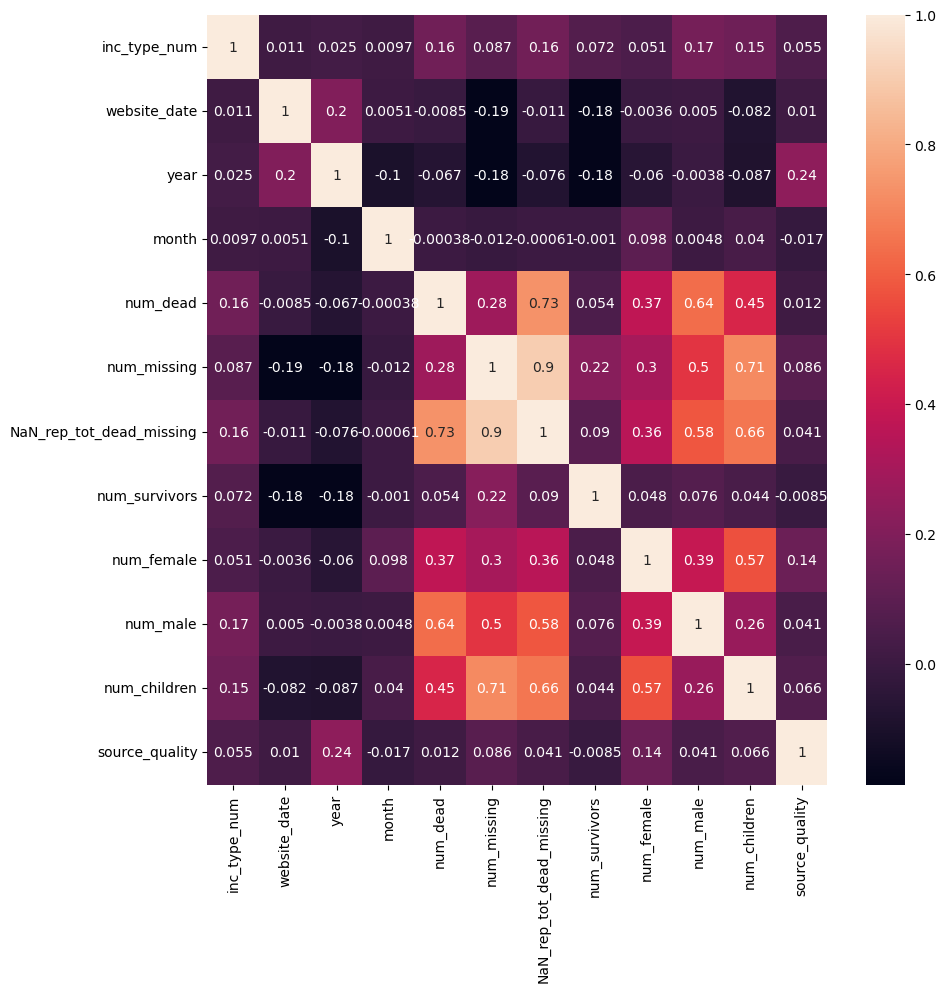

In [24]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub_2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Interpretation: Overall, one has to be careful interpreting the correlation, as some variables are linearly interdepent (numbers of deaths and missings and the particular numbers for males, females, children; as well as the overall sum). However, we can interprete some meaningful trends: 

The source quality is weakly positively correlated to the year, meaning that the more recenty the indicident happended, the better the source quality/ amount of coverage might be.
There is a stronger positive relation between source quality and higher number of females victimes compared to source quality and male victims/ child victims.

The early the incident happended, the higher the number of survivors (weak relationship). 

There is no seasonality: no trend regarding months and incidents. But: the more female victims, the later in the year.

### 2.2 Scatterplots for the variables with the strongest correlation

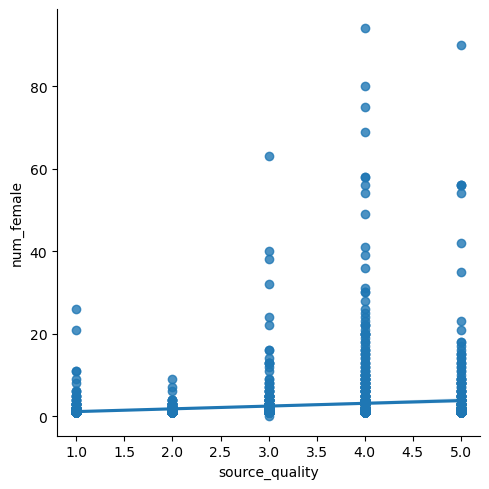

In [25]:
# Create a scatterplot for the "source_quality" and "num_females" columns in seaborn

sns.lmplot(x = 'source_quality', y = 'num_female', data = sub_2)

#### Weak linear tendency for increasing source quality when more females are victims.

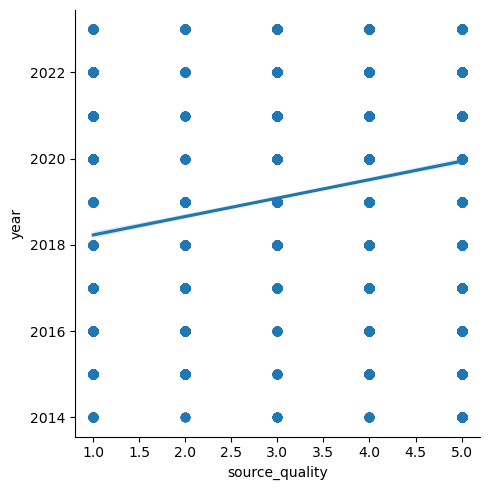

In [26]:
# Create a scatterplot for the "source_quality" and "year" columns in seaborn

sns.lmplot(x = 'source_quality', y = 'year', data = sub_2)

#### Weak linear tendency for increasing source quality with each year.

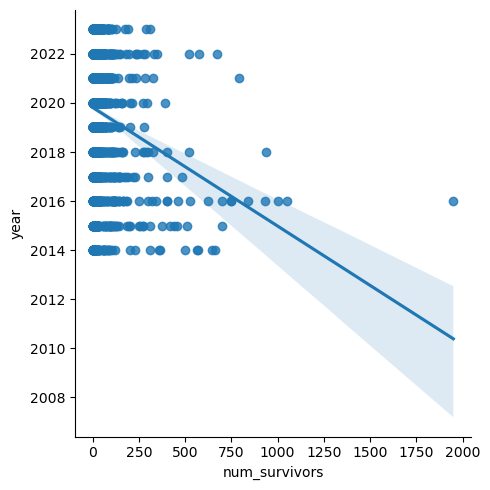

In [27]:
# Create a scatterplot for the "num_survivors" and "year" columns in seaborn

sns.lmplot(x = 'num_survivors', y = 'year', data = sub_2)

#### With every year, the number of survivors is smaller.

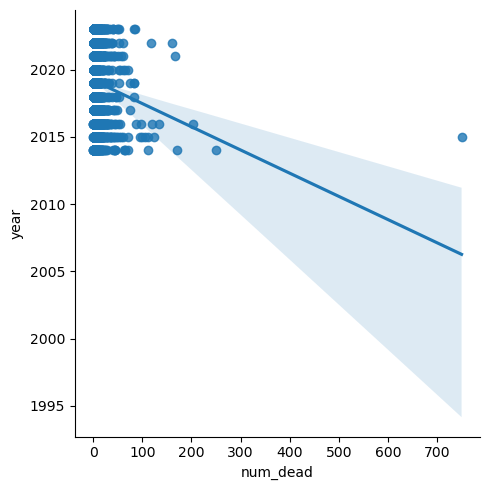

In [28]:
# Create a scatterplot for the "num_dead" and "year" columns in seaborn

sns.lmplot(x = 'num_dead', y = 'year', data = sub_2)

### but also the number of deaths?

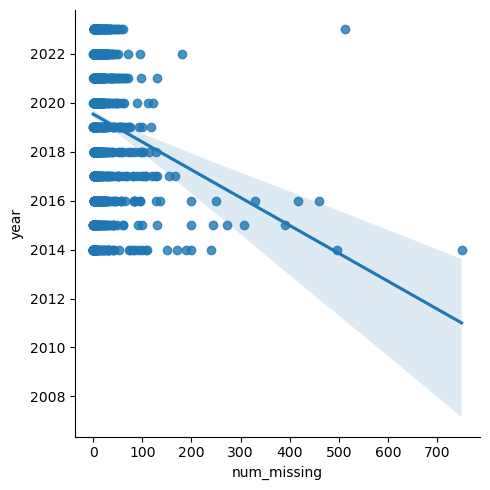

In [29]:
# Create a scatterplot for the "num_missing" and "year" columns in seaborn

sns.lmplot(x = 'num_missing', y = 'year', data = sub_2)

#### ... and missings?

### 2.3 Pair plots

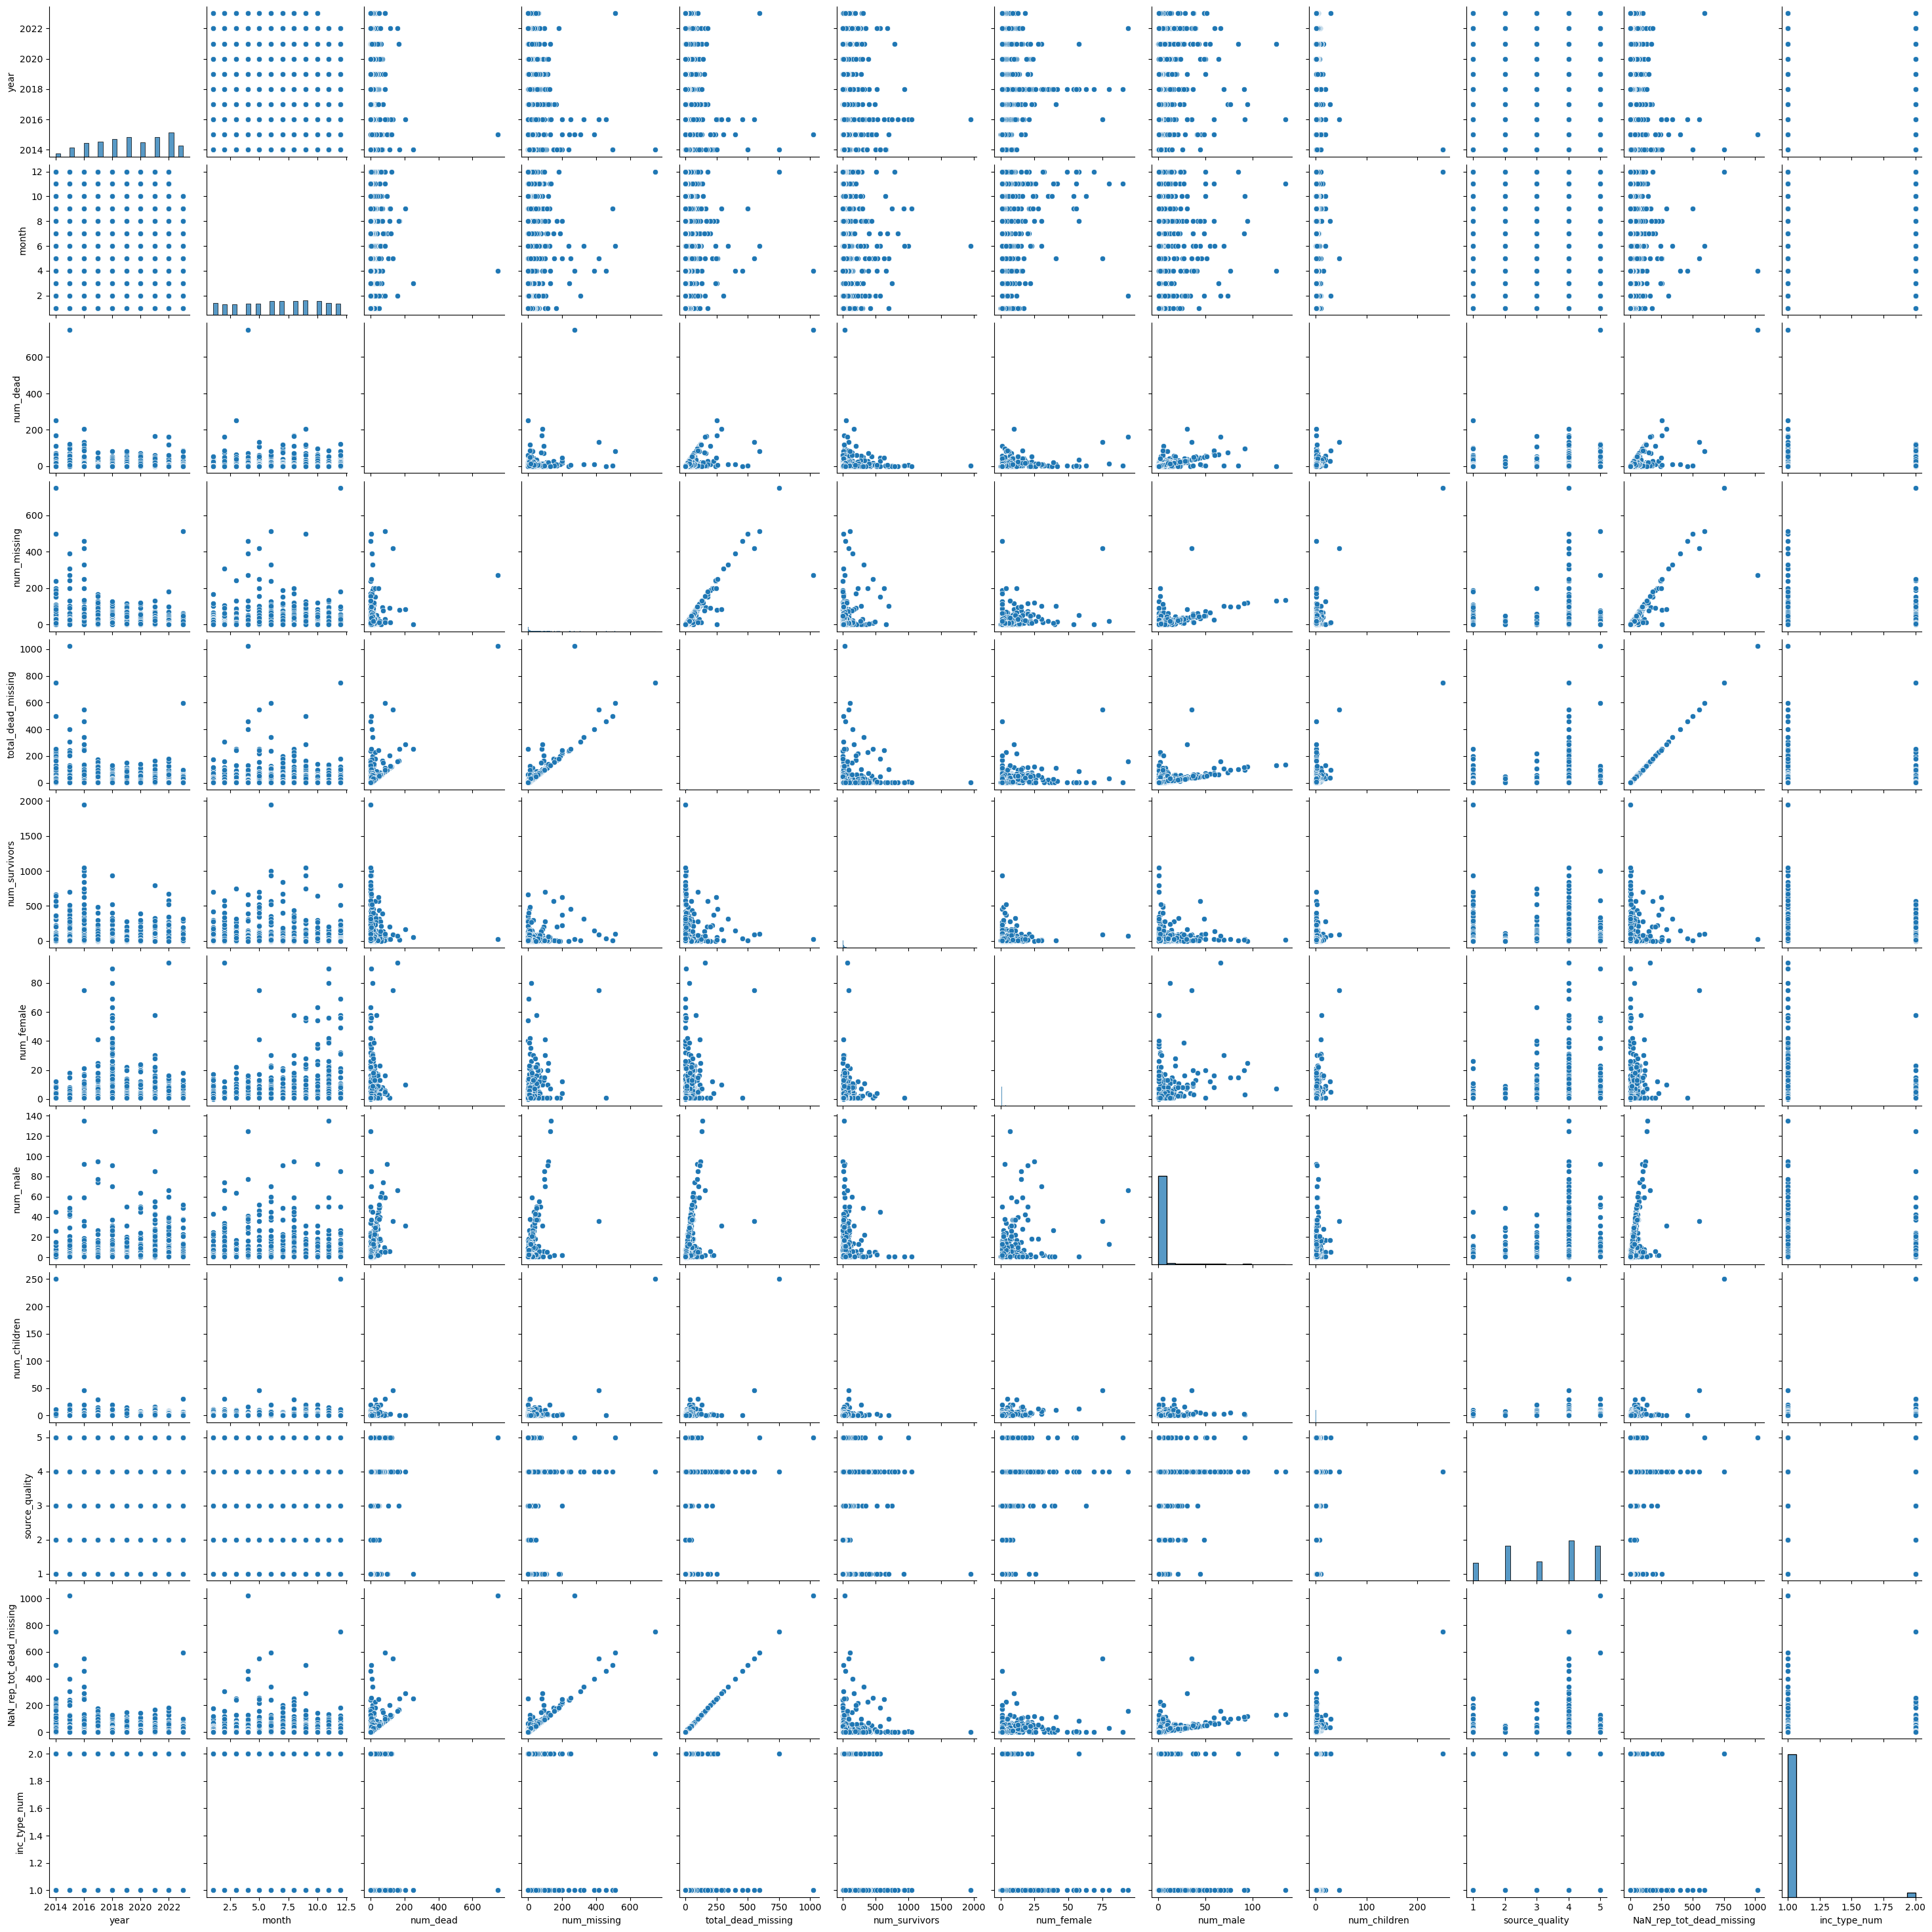

In [30]:
# Create a pair plot 

g = sns.pairplot(df_wrang)

### Many categorical variables and linearly dependent continuous variables. 

### Interesting: There seem to be tendencies of more outliers of deaths within summer months. I want to check this further, to explore seasonality.

### I want to further explore the relations between number of female, male, and child victims and overall numbers of deaths, missings, survivors considering the linear dependencies. I want to know who has the proportionally highest risk of dying. 

### Another variable to consider in that regard would be source quality: who has the highest risk of dying and of these deaths to be covered by media?

### 2.4 Categorical Plot

<Axes: xlabel='num_dead', ylabel='Count'>

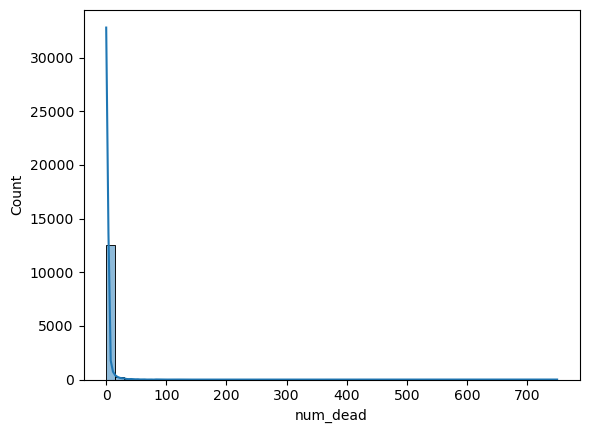

In [31]:
# Use a histogram to visualize the distribution of the variables. 
 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_wrang['num_dead'], bins = 50, kde = True)

In [32]:
df_wrang.loc[df_wrang['NaN_rep_tot_dead_missing'] < 5, 'Victims per incidents'] = '1-5'

In [33]:
df_wrang.loc[(df_wrang['NaN_rep_tot_dead_missing'] >= 6) & (df_wrang['NaN_rep_tot_dead_missing'] < 11), 'Victims per incidents'] = '6-10'

In [34]:
df_wrang.loc[(df_wrang['NaN_rep_tot_dead_missing'] >= 11) & (df_wrang['NaN_rep_tot_dead_missing'] < 21), 'Victims per incidents'] = '11-20'

In [35]:
df_wrang.loc[(df_wrang['NaN_rep_tot_dead_missing'] >= 21) & (df_wrang['NaN_rep_tot_dead_missing'] < 41), 'Victims per incidents'] = '21-40'

In [36]:
df_wrang.loc[(df_wrang['NaN_rep_tot_dead_missing'] >= 41) & (df_wrang['NaN_rep_tot_dead_missing'] < 101), 'Victims per incidents'] = '41-100'

In [37]:
df_wrang.loc[(df_wrang['NaN_rep_tot_dead_missing'] >= 101) & (df_wrang['NaN_rep_tot_dead_missing'] < 201), 'Victims per incidents'] = '101-200'

In [38]:
df_wrang.loc[(df_wrang['NaN_rep_tot_dead_missing'] >= 201) & (df_wrang['NaN_rep_tot_dead_missing'] < 501), 'Victims per incidents'] = '201-500'

In [39]:
df_wrang.loc[df_wrang['NaN_rep_tot_dead_missing'] >= 501,  'Victims per incidents'] = '>500'

In [40]:
df_wrang['Victims per incidents'].value_counts(dropna = False)

Victims per incidents
1-5        11659
6-10         633
11-20        451
21-40        280
NaN          233
41-100       180
101-200       38
201-500       15
>500           4
Name: count, dtype: int64

In [41]:
df_wrang = df_wrang.rename(columns={'Victims per incidents': 'vict_per_incidents'})
df_wrang.columns

Index(['main_ID', 'incident_ID', 'inc_type', 'region_inc', 'website_date',
       'year', 'month', 'num_dead', 'num_missing', 'total_dead_missing',
       'num_survivors', 'num_female', 'num_male', 'num_children', 'reg_origin',
       'cause_death', 'country_origin', 'migration_route', 'loc_death',
       'info_source', 'coordinates', 'UNSD_geo_group', 'article_title',
       'source_quality', 'url', 'NaN_rep_tot_dead_missing', 'inc_type_num',
       'vict_per_incidents'],
      dtype='object')

#### Variable "num_dead" is strongly left-skrewed.

### Create categorical plots in seaborn using the "victims per incidents" categories created above

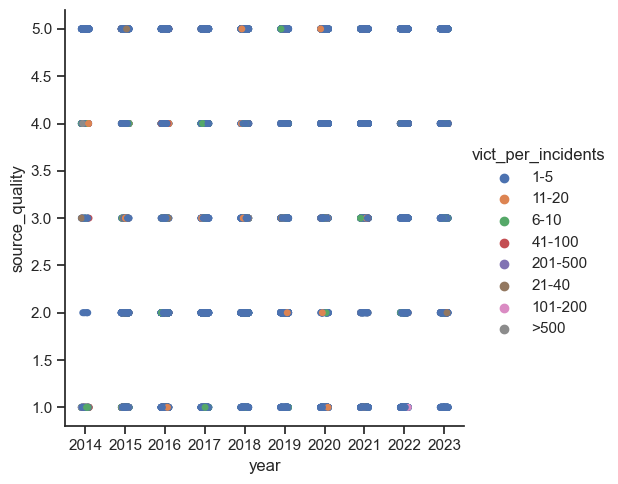

In [42]:
# Create a categorical plot in seaborn 

sns.set(style="ticks")
g = sns.catplot(x="year", y="source_quality", hue="vict_per_incidents", data=df_wrang)

#### No clear trend/ pattern.

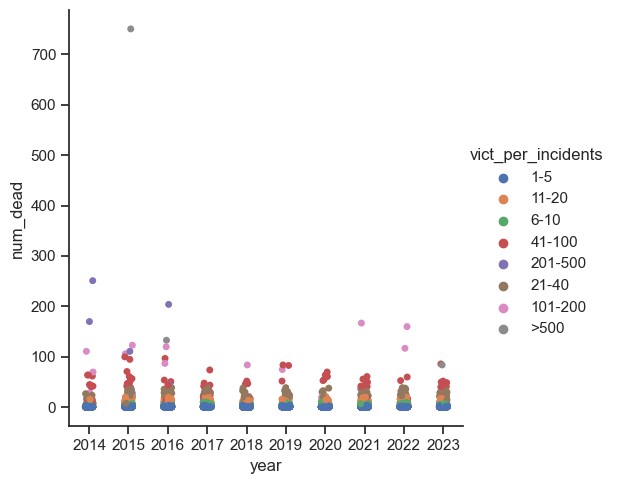

In [43]:
# Create categorical plot

sns.set(style="ticks")
g = sns.catplot(x="year", y="num_dead", hue="vict_per_incidents", data=df_wrang)

#### 2014, 2015, 2016, 2021, and 2022 have most outliers in numbers of victimes at once incident. In 2015, a really tragic event has happened with an extremly high number of victims.

### Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

Is the count of deaths related to months, is there "seasonality"?
--> No strong indication, however, this should be explored further.

Have females and children a greater risk to die on the migration routes?
--> Correlation heat map indicates strongest relation for higher overall numbers of deaths/missings and higher number of child victims. This, however, has to be intepreted with caution. Outliers can be detected in the Pair plots that may account for the higher correlation. Moreover, variables are linear dependent (children contribute to the overall numbers).

Further questions:

Higher numbers of deaths/ missings seems to be better covered (better source quality). Is this related to the location of incident? What confounding variables may account for this?

Who has the highest risk of dying and of these deaths to be covered by media?



### Define any hypotheses that you can at this point. You’ll be testing these later on.

If numbers of deaths and missings increase, than the source quality is better.
If there are more child victims, then the overall number of victims is higher.
If there are more female victims, then the source quality is higher.

In [44]:
# Export data to pkl
df_wrang.to_pickle(os.path.join(path, 'Data', 'prepared data', 'df_wrang.pkl'))